<a href="https://colab.research.google.com/github/hamednasr/tensorflow/blob/main/05_transfer_learning_in_tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-04 03:38:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-04 03:38:21 (71.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir 

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-03-03 16:28:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  47.3MB/s    in 3.4s    

2022-03-03 16:28:45 (47.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data('10_food_classes_10_percent.zip')

NameError: ignored

In [ ]:
walk_through_dir('10_food_classes_10_percent')

In [ ]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

NameError: ignored

In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images.shape, labels)

(32, 224, 224, 3) tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 

## Functional API

In [ ]:
base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255)(inputs) #if using resnet

x = base_model(inputs)
print(f'shapes of outputs from base model {x.shape}')

# x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
# print(f'shapes of outputs from global average pooling layer {x.shape}')
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs,outputs)


model_0.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])


52617216/52606240 [==============================] - 1s 0us/step
shapes of outputs from base model (None, 7, 7, 1536)


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
history_0 = model_0.fit(train_data_10_percent,epochs=5)

Epoch 1/5
24/24 [==============================] - 18s 262ms/step - loss: 2.1350 - accuracy: 0.6467
Epoch 2/5
24/24 [==============================] - 7s 261ms/step - loss: 0.1046 - accuracy: 0.9720
Epoch 3/5
24/24 [==============================] - 7s 261ms/step - loss: 0.0256 - accuracy: 0.9893
Epoch 4/5
24/24 [==============================] - 7s 263ms/step - loss: 0.0020 - accuracy: 0.9987
Epoch 5/5
24/24 [==============================] - 7s 261ms/step - loss: 7.9008e-05 - accuracy: 1.0000


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 24s 261ms/step - loss: 1.2831 - accuracy: 0.8228


[1.2830843925476074, 0.8227999806404114]

In [ ]:
plot_loss_curves(history_0)

KeyError: ignored

In [ ]:
!tensorboard dev upload --logdir ./tensorboard/ \
--name 'functional API model results on 10% food data' \
--one_shot

In [ ]:
base_model.summary()

In [ ]:
model_0.summary()

In [ ]:
base_model.layers

# Experiments: model1, model2, model3, model4

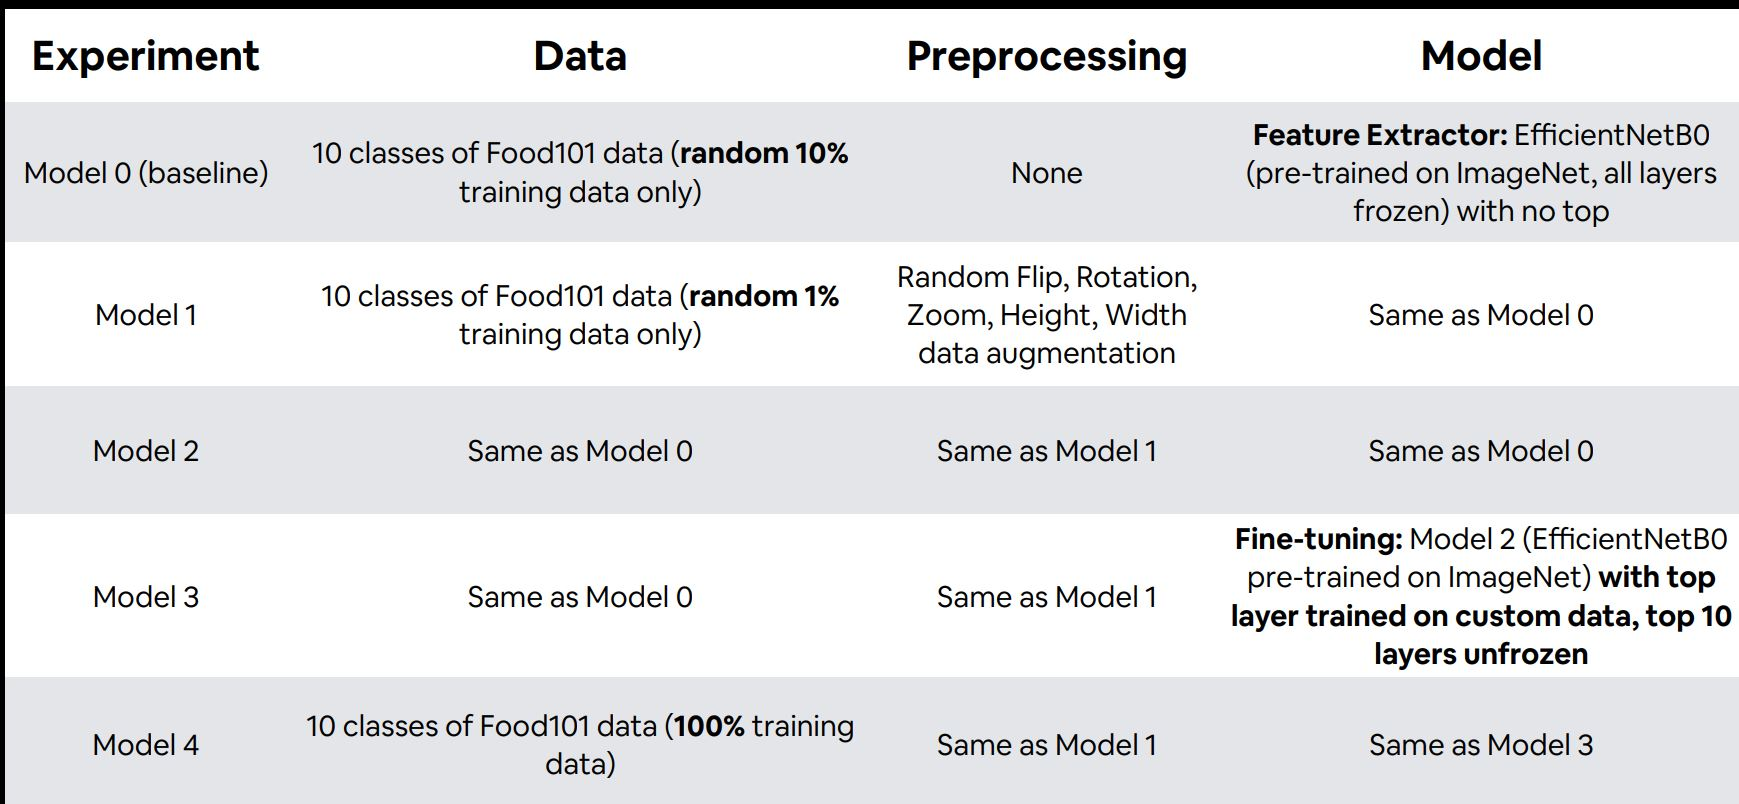

In [3]:
import tensorflow as tf

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-06 07:07:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-06 07:07:18 (77.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir 

## load data:

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-03-06 07:07:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   251MB/s    in 0.6s    

2022-03-06 07:07:20 (251 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
unzip_data('10_food_classes_10_percent.zip')

In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-03-06 07:07:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.164.144, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   240MB/s    in 0.5s    

2022-03-06 07:07:23 (240 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data('10_food_classes_1_percent.zip')

In [9]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-03-06 07:07:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.217.9.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   114MB/s    in 4.3s    

2022-03-06 07:07:36 (114 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
unzip_data('10_food_classes_all_data.zip')

## create training and test datasets:

In [11]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

In [12]:
test_dir = '10_food_classes_all_data/test'
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

Found 2500 files belonging to 10 classes.


In [13]:
print('training set:')
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_all_data/train',
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)
print('')
print('test set:')
test_data_all = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_all_data/test',
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)

training set:
Found 7500 files belonging to 10 classes.

test set:
Found 2500 files belonging to 10 classes.


In [18]:
print('training set:')
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_10_percent/train',
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
print('')
print('test set:')
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_10_percent/test',
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)

training set:
Found 750 files belonging to 10 classes.

test set:
Found 2500 files belonging to 10 classes.


In [ ]:
print('training set:')
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_1_percent/train/',
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
print('')
print('test set:')
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_1_percent/test/',
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)

training set:
Found 70 files belonging to 10 classes.

test set:
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_all.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.Resizing(224,224)
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

And that's it! Our data augmentation Sequential model is ready to go. As you'll see shortly, we'll be able to slot this "model" as a layer into our transfer learning model later on.

But before we do that, let's test it out by passing random images through it.

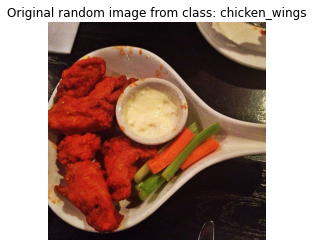

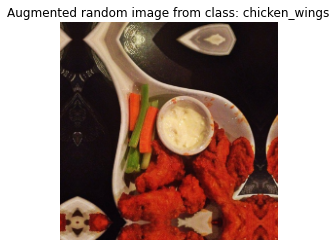

In [19]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_10_percent.class_names) # choose a random class
target_dir = "10_food_classes_10_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(img) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow((augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## building model 1 , using only 1 percent of training data using Functional API:


### model 1 without data augmentation:

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# x = data_augmentation(inputs)

x = base_model(inputs,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_1 = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_1')

model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 627,210
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_1.fit(train_data_1_percent,
            epochs=15, 
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=create_tensorboard_callback('tensorboard','model_1'))

Saving TensorBoard log files to: tensorboard/model_1/20220304-082125
Epoch 1/15
3/3 [==============================] - 15s 4s/step - loss: 2.7644 - accuracy: 0.2714 - val_loss: 2.1608 - val_accuracy: 0.5115
Epoch 2/15
3/3 [==============================] - 4s 2s/step - loss: 0.2097 - accuracy: 0.9714 - val_loss: 3.3350 - val_accuracy: 0.5099
Epoch 3/15
3/3 [==============================] - 3s 2s/step - loss: 1.6705e-04 - accuracy: 1.0000 - val_loss: 4.2252 - val_accuracy: 0.5082
Epoch 4/15
3/3 [==============================] - 6s 3s/step - loss: 4.6700e-05 - accuracy: 1.0000 - val_loss: 4.9306 - val_accuracy: 0.5000
Epoch 5/15
3/3 [==============================] - 4s 2s/step - loss: 6.3684e-05 - accuracy: 1.0000 - val_loss: 5.6162 - val_accuracy: 0.4803
Epoch 6/15
3/3 [==============================] - 3s 2s/step - loss: 6.0654e-05 - accuracy: 1.0000 - val_loss: 6.1823 - val_accuracy: 0.4770
Epoch 7/15
3/3 [==============================] - 3s 2s/step - loss: 3.1867e-05 - accuracy: 

KeyboardInterrupt: ignored

In [ ]:
model_1.evaluate(test_data) 

### model 1 with data augmentation:

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = data_augmentation(inputs)

x = base_model(x,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_1_aug = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_1')

model_1_aug.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_aug.summary()

In [ ]:
model_1_aug.fit(train_data_1_percent,
            epochs=15, 
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=create_tensorboard_callback('tensorboard','model_1_aug'))

In [ ]:
model_1_aug.evaluate(test_data) 

## building model 2 , using 10 percent of training data using Functional API:


### model 2 without data augmentation:

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# x = data_augmentation(inputs)

x = base_model(inputs,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_2 = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_2')

model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 627,210
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_2.fit(train_data_10_percent,
            epochs=15, 
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=[create_tensorboard_callback('tensorboard','model_2')])

Saving TensorBoard log files to: tensorboard/model_2/20220304-082231
Epoch 1/15
24/24 [==============================] - ETA: 0s - loss: 2.8014 - accuracy: 0.5667
Epoch 1: saving model to 10_percent_model_wrights/checkpoint.ckpt
24/24 [==============================] - 19s 397ms/step - loss: 2.8014 - accuracy: 0.5667 - val_loss: 1.5245 - val_accuracy: 0.7286
Epoch 2/15
24/24 [==============================] - ETA: 0s - loss: 0.2073 - accuracy: 0.9560
Epoch 2: saving model to 10_percent_model_wrights/checkpoint.ckpt
24/24 [==============================] - 9s 370ms/step - loss: 0.2073 - accuracy: 0.9560 - val_loss: 1.2725 - val_accuracy: 0.7780
Epoch 3/15
24/24 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9880
Epoch 3: saving model to 10_percent_model_wrights/checkpoint.ckpt
24/24 [==============================] - 9s 370ms/step - loss: 0.0498 - accuracy: 0.9880 - val_loss: 1.4068 - val_accuracy: 0.7895
Epoch 4/15
24/24 [==============================] - ETA: 

In [ ]:
model_2.evaluate(test_data) 

79/79 [==============================] - 11s 132ms/step - loss: 1.5325 - accuracy: 0.7840


[1.532547116279602, 0.7839999794960022]

### model 2 with data augmentation:

In [1]:
checkpoint_path = '10_percent_model_weights/checkpoint.ckpt'

In [2]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         verbose=1)

NameError: ignored

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = data_augmentation(inputs)

x = base_model(x,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_2_aug = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_2_aug')

model_2_aug.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2_aug.summary()

Model: "model_2_aug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (224, 224, 3)            0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 627,210
Non-trainable params: 4,049,571
_______________________________________

In [ ]:
history_model_2_aug = model_2_aug.fit(train_data_10_percent,
                        epochs=15, 
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback('tensorboard','model_2_aug'),
                                  checkpoint_callback])

Saving TensorBoard log files to: tensorboard/model_2_aug/20220305-092552
Epoch 1/15
24/24 [==============================] - ETA: 0s - loss: 2.7184 - accuracy: 0.4867WARNING:tensorflow:Model was constructed with shape (512, None, 3) for input KerasTensor(type_spec=TensorSpec(shape=(512, None, 3), dtype=tf.uint8, name='random_flip_input'), name='random_flip_input', description="created by layer 'random_flip_input'"), but it was called on an input with incompatible shape (None, 224, 224, 3).

Epoch 1: saving model to 10_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 17s 368ms/step - loss: 2.7184 - accuracy: 0.4867 - val_loss: 1.7567 - val_accuracy: 0.7155
Epoch 2/15
24/24 [==============================] - ETA: 0s - loss: 1.3258 - accuracy: 0.7493
Epoch 2: saving model to 10_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 7s 293ms/step - loss: 1.3258 - accuracy: 0.7493 - val_loss: 1.7565 - val_accuracy: 0.7155
Epoch 3/15
24/2

In [ ]:
model_2_aug.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.3793 - accuracy: 0.7820


[2.3792824745178223, 0.7820000052452087]

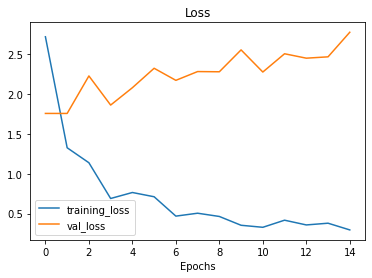

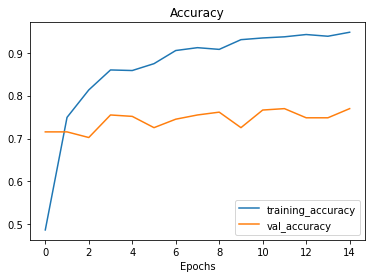

In [ ]:
plot_loss_curves(history_model_2_aug)

## building model 3 , using 10 percent of training data using Functional API and top 10 layers of effiecientnet unfrozen:


### model 3 with data augmentation:

In [24]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = data_augmentation(inputs)

x = base_model(x,training=False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)

model_3_aug = tf.keras.Model(inputs=inputs,outputs=outputs,name='model_3_aug')



model_3_aug.summary()

Model: "model_3_aug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (224, 224, 3)            0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 output_layer (Dense)        (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 4,634,758
Non-trainable params: 42,023
________________________________________

In [ ]:
model_3_aug.load_weights(checkpoint_path)

In [ ]:
model_3_aug.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_3_aug.evaluate(test_data)

79/79 [==============================] - 14s 133ms/step - loss: 2.3793 - accuracy: 0.7820


[2.3792824745178223, 0.7820000052452087]

In [ ]:
model_3_aug.layers

In [ ]:
for layer in model_3_aug.layers[2].layers[:-10]:
  layer.trainable=False

In [ ]:
for i, layer in enumerate(model_3_aug.layers[2].layers):
  print(i , layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7fd95077d410> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fd9521f2390> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7fd95226f590> False
3 <keras.layers.convolutional.ZeroPadding2D object at 0x7fd9521e2590> False
4 <keras.layers.convolutional.Conv2D object at 0x7fd950774510> False
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd950786fd0> False
6 <keras.layers.core.activation.Activation object at 0x7fd950774590> False
7 <keras.layers.convolutional.DepthwiseConv2D object at 0x7fd95071be50> False
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd9507237d0> False
9 <keras.layers.core.activation.Activation object at 0x7fd9507160d0> False
10 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7fd950728b50> False
11 <keras.layers.core.reshape.Reshape object at 0x7fd950737210> False
12 <keras.layers.convo

In [ ]:
len(model_3_aug.trainable_variables)

12

In [ ]:
#when you change a parameter , you should compile the model
model_3_aug.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                    metrics=['accuracy'])

In [ ]:
history_model_2_aug.epoch[-1]

14

In [ ]:
history_model_3_aug = model_3_aug.fit(train_data_10_percent,
                          epochs=20, 
                          validation_data=test_data,
                          initial_epoch=history_model_2_aug.epoch[-1],
                          validation_steps=int(0.25*len(test_data)),
                          callbacks=[create_tensorboard_callback('tensorboard','model_3_aug'),checkpoint_callback])

Saving TensorBoard log files to: tensorboard/model_3_aug/20220305-093429
Epoch 15/20
24/24 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.9800
Epoch 15: saving model to 10_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 8s 303ms/step - loss: 0.0747 - accuracy: 0.9800 - val_loss: 2.0134 - val_accuracy: 0.7714
Epoch 16/20
24/24 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9920
Epoch 16: saving model to 10_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 10s 391ms/step - loss: 0.0319 - accuracy: 0.9920 - val_loss: 1.7525 - val_accuracy: 0.7911
Epoch 17/20
24/24 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9760
Epoch 17: saving model to 10_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 10s 390ms/step - loss: 0.0752 - accuracy: 0.9760 - val_loss: 1.8680 - val_accuracy: 0.7829
Epoch 18/20
24/24 [===========================

In [ ]:
model_3_aug.evaluate(test_data) 

79/79 [==============================] - 11s 132ms/step - loss: 1.6275 - accuracy: 0.7908


[1.627465844154358, 0.7907999753952026]

In [ ]:
base_model

In [ ]:
model_3_aug.layers[2]

In [ ]:
model_3_aug.layers[2] is base_model

True

In [ ]:
len(model_3_aug.layers[2].trainable_variables)

10

In [ ]:
for layer in base_model.layers[-20:-10]:
  layer.trainable = True

In [ ]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)


input_11 False
rescaling_10 False
normalization_10 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv Fa

In [ ]:
#when you change a parameter , you should compile the model
model_3_aug.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                    metrics=['accuracy'])

In [ ]:
history_model_3_aug.epoch[-1]

19

In [ ]:
history_model_3_aug_20trainable = model_3_aug.fit(train_data_10_percent,
                          epochs=25, 
                          validation_data=test_data,
                          initial_epoch=history_model_3_aug.epoch[-1]+1,
                          validation_steps=int(0.25*len(test_data)),
                          callbacks=[create_tensorboard_callback('tensorboard','model_3_aug'),checkpoint_callback])

Saving TensorBoard log files to: tensorboard/model_3_aug/20220305-095327
Epoch 21/25
24/24 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9840WARNING:tensorflow:Model was constructed with shape (512, None, 3) for input KerasTensor(type_spec=TensorSpec(shape=(512, None, 3), dtype=tf.uint8, name='random_flip_input'), name='random_flip_input', description="created by layer 'random_flip_input'"), but it was called on an input with incompatible shape (None, 224, 224, 3).

Epoch 21: saving model to 10_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 19s 430ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 1.9197 - val_accuracy: 0.7796
Epoch 22/25
24/24 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9867
Epoch 22: saving model to 10_percent_model_weights/checkpoint.ckpt
24/24 [==============================] - 11s 405ms/step - loss: 0.0351 - accuracy: 0.9867 - val_loss: 2.1382 - val_accuracy: 0.7599
Epoch 23/2

In [ ]:
len(model_3_aug.trainable_variables)

21

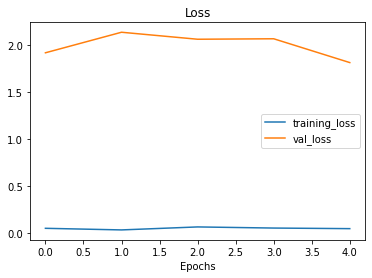

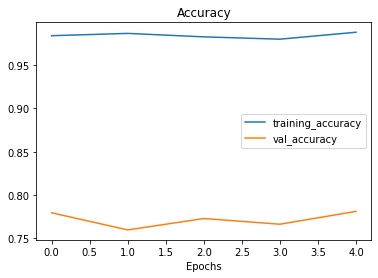

In [ ]:
plot_loss_curves(history_model_3_aug_20trainable)

## building model 4, using all data:


In [29]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model_4 = tf.keras.Model(inputs,outputs)

model_4.summary()
                                              

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (224, 224, 3)            0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                627210    
                                                                 
Total params: 4,676,781
Trainable params: 4,634,758
Non-trainable params: 42,023
____________________________________________

In [ ]:
!tensorboard dev upload --logdir ./tensorboard \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finish